### Chebyshev filter design

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
from sclibrary import dataset_loader
from sclibrary import SCPlot

sc, coordinates = dataset_loader.load_paper_data()

# create a plot
scplot = SCPlot(sc, coordinates)

In [3]:
f = np.array([
    0.0323,
    0.4980,
    2.3825,
    0.8799,
    -0.5297,
    -0.5192,
    1.0754,
    0.4732,
    -1.1667,
    0.0922
])

In [4]:
from sclibrary.filters import ChebyshevFilterDesign

filter = ChebyshevFilterDesign(simplicial_complex=sc)
comp_coeffs = sc.get_component_coefficients(component="gradient")
filter.get_ideal_frequency(p_choice="L1L", component_coeffs=comp_coeffs)

array([[ 0.39080614,  0.24947938,  0.00885067, -0.1607015 , -0.1499855 ,
         0.04622507, -0.05588552,  0.22811614,  0.24803025,  0.08823208],
       [ 0.24947938,  0.5943116 ,  0.00111479,  0.25271066, -0.15979708,
        -0.0794724 , -0.16188017,  0.13564375, -0.1082169 ,  0.07549225],
       [ 0.00885067,  0.00111479,  0.64883117,  0.10376043,  0.12367344,
        -0.20810524, -0.21612518,  0.01488755,  0.20610943, -0.19644898],
       [-0.1607015 ,  0.25271066,  0.10376043,  0.39403742, -0.05830702,
        -0.18869833, -0.04299379, -0.11137747, -0.27434121, -0.09464577],
       [-0.1499855 , -0.15979708,  0.12367344, -0.05830702,  0.648572  ,
         0.03030862, -0.21318647, -0.03853712,  0.0731658 , -0.03078069],
       [ 0.04622507, -0.0794724 , -0.20810524, -0.18869833,  0.03030862,
         0.56578072, -0.23307346,  0.27146472, -0.26638349, -0.00769373],
       [-0.05588552, -0.16188017, -0.21612518, -0.04299379, -0.21318647,
        -0.23307346,  0.56254943, -0.08535559

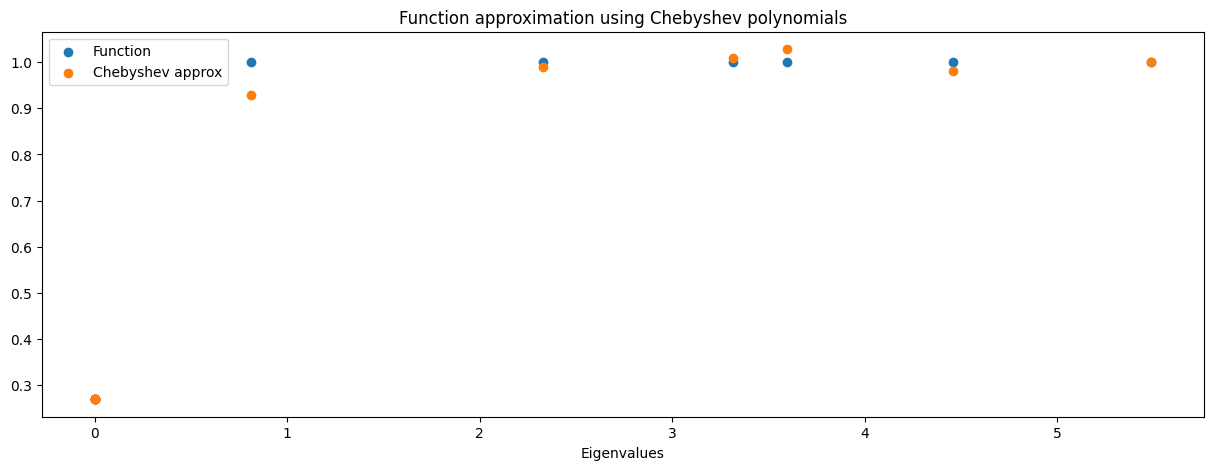

In [5]:
filter.plot_chebyshev_series_approx(p_choice="L1L")

In [7]:
# apply filter
filter.apply(f=f, p_choice="L1L", component="gradient", L=100)

Applying Chebyshev filter
Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximation for k = 17...
Calculating Ch

Text(0.5, 1.0, 'Error per filter size')

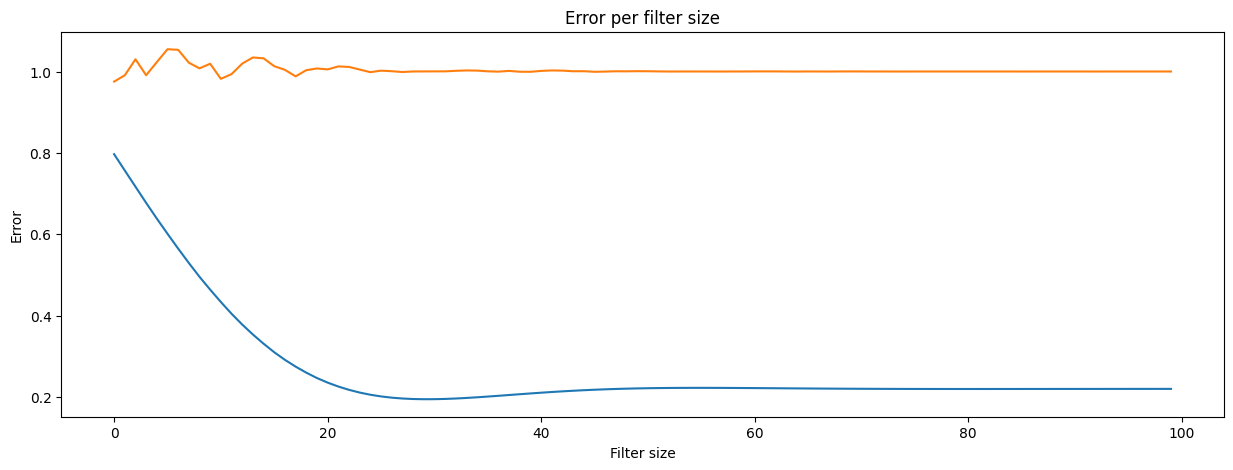

In [8]:
import matplotlib.pyplot as plt

extracted_comp_error = filter.history["extracted_component_error"]
filter_error = filter.history["filter_error"]

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(extracted_comp_error)
plt.plot(filter_error)
plt.xlabel("Filter size")
plt.ylabel("Error")
plt.title("Error per filter size")

In [9]:
filter.history["frequency_responses"][-1]

array([-0.26893968,  1.00004704,  0.26894142,  0.99991129,  0.26894906,
        0.99999856,  0.99998401,  0.26893884, -0.99997856, -0.99998932])

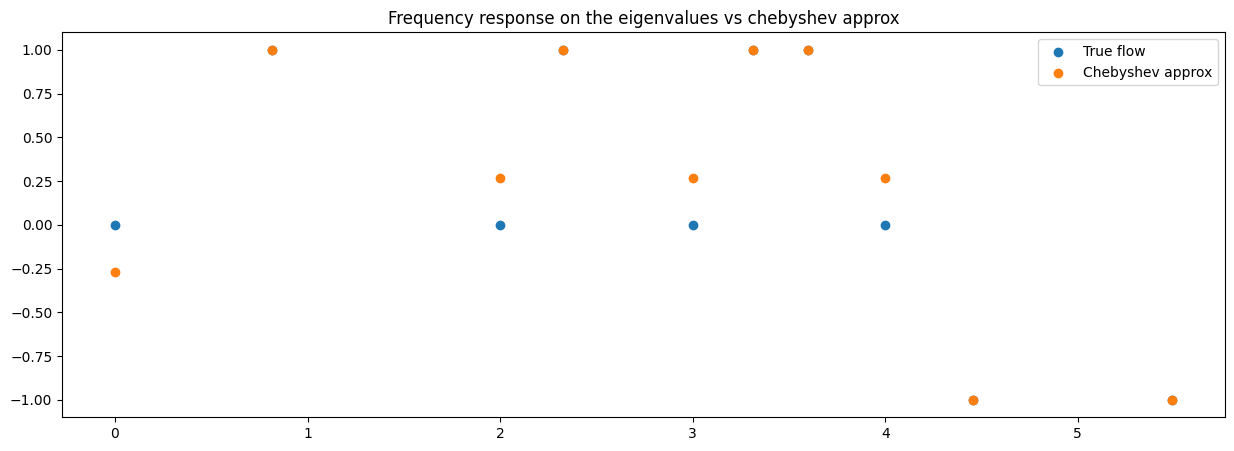

In [10]:
filter.plot_frequency_response_approx(flow=f, component="gradient")

In [11]:
error = filter.history["extracted_component_error"][-1]
print(f"Error: {error}")

Error: 0.21959414760237037
